In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import seaborn as sb

In [5]:
%matplotlib inline

In [7]:
train=pd.read_csv("train.csv")

In [9]:
test=pd.read_csv("test.csv")

In [10]:
print('We have {} training rows and {} test rows.'.format(train.shape[0], test.shape[0]))
print('We have {} training columns and {} test columns.'.format(train.shape[1], test.shape[1]))

We have 1048575 training rows and 625134 test rows.
We have 11 training columns and 9 test columns.


In [11]:
train.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,14-03-2016 17:24,14-03-2016 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,12-06-2016 00:43,12-06-2016 00:54,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,19-01-2016 11:35,19-01-2016 12:10,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,06-04-2016 19:32,06-04-2016 19:39,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,26-03-2016 13:30,26-03-2016 13:38,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [12]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.534503e+00,1.664382e+00,-7.397342e+01,4.075094e+01,-7.397336e+01,4.075183e+01,9.621448e+02
std,4.988084e-01,1.314261e+00,4.280165e-02,3.381389e-02,4.274282e-02,3.645002e-02,5.853002e+03
min,1.000000e+00,0.000000e+00,-7.854740e+01,3.435970e+01,-7.981798e+01,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399186e+01,4.073738e+01,-7.399131e+01,4.073594e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075415e+01,-7.397973e+01,4.075455e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396731e+01,4.076836e+01,-7.396301e+01,4.076984e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.391176e+01,3.526282e+06


In [13]:
train.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [14]:
train.info

<bound method DataFrame.info of                 id  vendor_id   pickup_datetime  dropoff_datetime  \
0        id2875421          2  14-03-2016 17:24  14-03-2016 17:32   
1        id2377394          1  12-06-2016 00:43  12-06-2016 00:54   
2        id3858529          2  19-01-2016 11:35  19-01-2016 12:10   
3        id3504673          2  06-04-2016 19:32  06-04-2016 19:39   
4        id2181028          2  26-03-2016 13:30  26-03-2016 13:38   
5        id0801584          2  30-01-2016 22:01  30-01-2016 22:09   
6        id1813257          1  17-06-2016 22:34  17-06-2016 22:40   
7        id1324603          2  21-05-2016 07:54  21-05-2016 08:20   
8        id1301050          1  27-05-2016 23:12  27-05-2016 23:16   
9        id0012891          2  10-03-2016 21:45  10-03-2016 22:05   
10       id1436371          2  10-05-2016 22:08  10-05-2016 22:29   
11       id1299289          2  15-05-2016 11:16  15-05-2016 11:34   
12       id1187965          2  19-02-2016 09:52  19-02-2016 10:11   
13

Data Preparation

In [15]:
m = np.mean(train['trip_duration'])

In [16]:
s = np.std(train['trip_duration'])

In [17]:
train = train[train['trip_duration'] <= m + 2*s]

In [18]:
train = train[train['trip_duration'] >= m - 2*s]

In [19]:
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,14-03-2016 17:24,14-03-2016 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,12-06-2016 00:43,12-06-2016 00:54,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,19-01-2016 11:35,19-01-2016 12:10,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,06-04-2016 19:32,06-04-2016 19:39,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,26-03-2016 13:30,26-03-2016 13:38,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,30-01-2016 22:01,30-01-2016 22:09,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,17-06-2016 22:34,17-06-2016 22:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,21-05-2016 07:54,21-05-2016 08:20,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,27-05-2016 23:12,27-05-2016 23:16,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,10-03-2016 21:45,10-03-2016 22:05,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85) 

In [20]:
train = train[train['pickup_longitude'] <= -73.75]

In [21]:
train = train[train['pickup_longitude'] >= -74.03]

In [22]:
train = train[train['pickup_latitude'] <= 40.85]

In [23]:
train = train[train['pickup_latitude'] >= 40.63]

In [24]:
train = train[train['dropoff_longitude'] <= -73.75]

In [25]:
train = train[train['dropoff_longitude'] >= -74.03]

In [26]:
train = train[train['dropoff_latitude'] <= 40.85]

In [27]:
train = train[train['dropoff_latitude'] >= 40.63]

In [28]:
from datetime import datetime

In [29]:
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)

In [30]:
test['pickup_datetime'] = pd.to_datetime(test.pickup_datetime)

In [31]:
train.loc[:, 'pickup_date'] = train['pickup_datetime'].dt.date

In [32]:
test.loc[:, 'pickup_date'] = test['pickup_datetime'].dt.date

In [33]:
train['dropoff_datetime'] = pd.to_datetime(train.dropoff_datetime)

Data Visualization


In [34]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date
0,id2875421,2,2016-03-14 17:24:00,2016-03-14 17:32:00,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14
1,id2377394,1,2016-12-06 00:43:00,2016-12-06 00:54:00,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-12-06
2,id3858529,2,2016-01-19 11:35:00,2016-01-19 12:10:00,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19
3,id3504673,2,2016-06-04 19:32:00,2016-06-04 19:39:00,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-06-04
4,id2181028,2,2016-03-26 13:30:00,2016-03-26 13:38:00,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26


In [35]:
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date
0,id2875421,2,2016-03-14 17:24:00,2016-03-14 17:32:00,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14
1,id2377394,1,2016-12-06 00:43:00,2016-12-06 00:54:00,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-12-06
2,id3858529,2,2016-01-19 11:35:00,2016-01-19 12:10:00,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19
3,id3504673,2,2016-06-04 19:32:00,2016-06-04 19:39:00,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-06-04
4,id2181028,2,2016-03-26 13:30:00,2016-03-26 13:38:00,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26
5,id0801584,2,2016-01-30 22:01:00,2016-01-30 22:09:00,6,-73.982857,40.742195,-73.992081,40.749184,N,443,2016-01-30
6,id1813257,1,2016-06-17 22:34:00,2016-06-17 22:40:00,4,-73.969017,40.757839,-73.957405,40.765896,N,341,2016-06-17
7,id1324603,2,2016-05-21 07:54:00,2016-05-21 08:20:00,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,2016-05-21
8,id1301050,1,2016-05-27 23:12:00,2016-05-27 23:16:00,1,-73.999481,40.738400,-73.985786,40.732815,N,255,2016-05-27
9,id0012891,2,2016-10-03 21:45:00,2016-10-03 22:05:00,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,2016-10-03


In [36]:
train.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_date                   object
dtype: object

(array([  2.22250000e+04,   8.79580000e+04,   1.29342000e+05,
          1.33565000e+05,   1.19711000e+05,   1.02475000e+05,
          8.49250000e+04,   6.98050000e+04,   5.52510000e+04,
          4.45120000e+04,   3.52650000e+04,   2.84070000e+04,
          2.24880000e+04,   1.77440000e+04,   1.41190000e+04,
          1.13560000e+04,   8.97700000e+03,   7.17200000e+03,
          5.81400000e+03,   4.94700000e+03,   4.17500000e+03,
          3.33600000e+03,   2.87300000e+03,   2.47000000e+03,
          2.06100000e+03,   1.74200000e+03,   1.50600000e+03,
          1.27400000e+03,   1.08100000e+03,   9.78000000e+02,
          7.98000000e+02,   6.45000000e+02,   6.05000000e+02,
          4.98000000e+02,   4.16000000e+02,   4.02000000e+02,
          3.32000000e+02,   2.72000000e+02,   2.32000000e+02,
          1.95000000e+02,   1.66000000e+02,   1.53000000e+02,
          1.19000000e+02,   8.60000000e+01,   9.40000000e+01,
          5.50000000e+01,   6.50000000e+01,   5.00000000e+01,
        

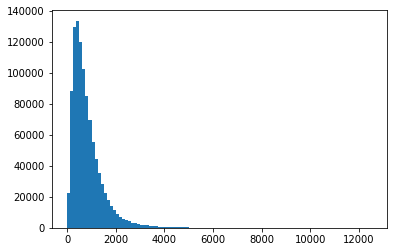

In [37]:
plt.hist(train['trip_duration'].values, bins=100)

Text(0,0.5,'number of train records')

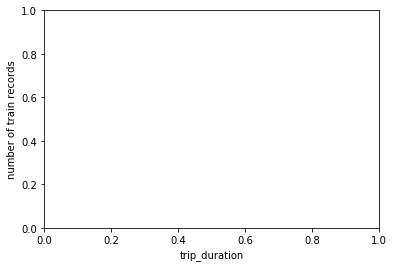

In [38]:
plt.xlabel('trip_duration')
plt.ylabel('number of train records')

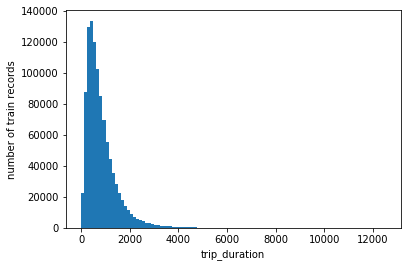

In [39]:
plt.hist(train['trip_duration'].values, bins=100)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.show()

Most of the data is skewed to the left, by applying the transformations we can normally distribute the data

In [40]:
train['log_trip_duration'] = np.log(train['trip_duration'].values + 1)

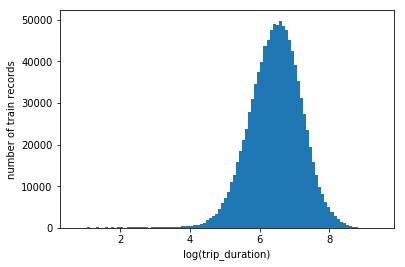

In [41]:
plt.hist(train['log_trip_duration'].values, bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()

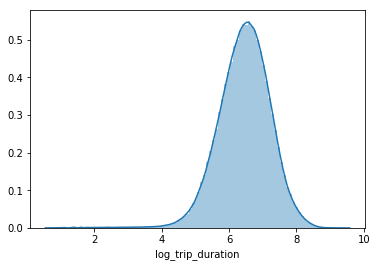

In [42]:
sb.distplot(train["log_trip_duration"], bins =100)

to find the seasonality in train and test for the trips we can plot the line graph and found the same seasonality between the train and test

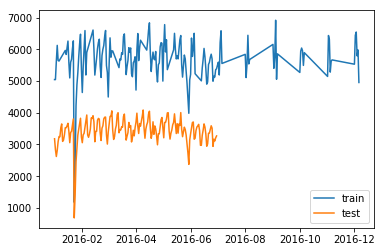

In [43]:
plt.plot(train.groupby('pickup_date').count()[['id']], label='train')
plt.plot(test.groupby('pickup_date').count()[['id']], label='test')
plt.legend(loc=0)
plt.show()

In [44]:
plot_vendor = train.groupby('vendor_id')['trip_duration'].mean()

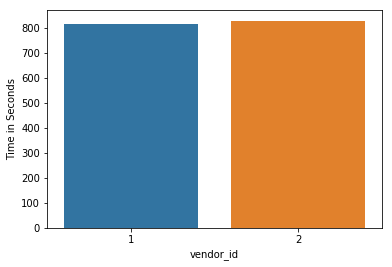

In [45]:
plt.ylabel('Time in Seconds')
sb.barplot(plot_vendor.index,plot_vendor.values)

In [46]:
sflag = train.groupby('store_and_fwd_flag')['trip_duration'].mean()

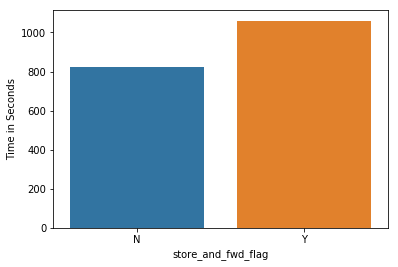

In [47]:
plt.ylabel('Time in Seconds')
sb.barplot(sflag.index,sflag.values)

In [48]:
pc = train.groupby('passenger_count')['trip_duration'].mean()

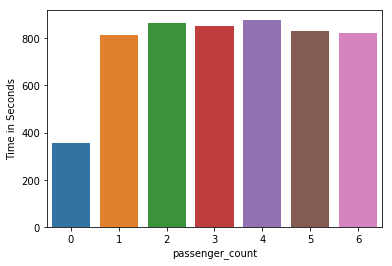

In [49]:
plt.ylabel('Time in Seconds')
sb.barplot(pc.index,pc.values)

In [50]:
train['pickup_day'] = train['pickup_datetime'].dt.day
train['pickup_month'] = train['pickup_datetime'].dt.month
train['pickup_weekday'] = train['pickup_datetime'].dt.weekday
train['pickup_hour'] = train['pickup_datetime'].dt.hour

In [51]:
train['drop_day'] = train['dropoff_datetime'].dt.day
train['drop_month'] = train['dropoff_datetime'].dt.month
train['drop_weekday'] = train['dropoff_datetime'].dt.weekday
train['drop_hour'] = train['dropoff_datetime'].dt.hour

In [52]:
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_date,log_trip_duration,pickup_day,pickup_month,pickup_weekday,pickup_hour,drop_day,drop_month,drop_weekday,drop_hour
0,id2875421,2,2016-03-14 17:24:00,2016-03-14 17:32:00,1,-73.982155,40.767937,-73.964630,40.765602,N,...,2016-03-14,6.122493,14,3,0,17,14,3,0,17
1,id2377394,1,2016-12-06 00:43:00,2016-12-06 00:54:00,1,-73.980415,40.738564,-73.999481,40.731152,N,...,2016-12-06,6.498282,6,12,1,0,6,12,1,0
2,id3858529,2,2016-01-19 11:35:00,2016-01-19 12:10:00,1,-73.979027,40.763939,-74.005333,40.710087,N,...,2016-01-19,7.661527,19,1,1,11,19,1,1,12
3,id3504673,2,2016-06-04 19:32:00,2016-06-04 19:39:00,1,-74.010040,40.719971,-74.012268,40.706718,N,...,2016-06-04,6.063785,4,6,5,19,4,6,5,19
4,id2181028,2,2016-03-26 13:30:00,2016-03-26 13:38:00,1,-73.973053,40.793209,-73.972923,40.782520,N,...,2016-03-26,6.077642,26,3,5,13,26,3,5,13
5,id0801584,2,2016-01-30 22:01:00,2016-01-30 22:09:00,6,-73.982857,40.742195,-73.992081,40.749184,N,...,2016-01-30,6.095825,30,1,5,22,30,1,5,22
6,id1813257,1,2016-06-17 22:34:00,2016-06-17 22:40:00,4,-73.969017,40.757839,-73.957405,40.765896,N,...,2016-06-17,5.834811,17,6,4,22,17,6,4,22
7,id1324603,2,2016-05-21 07:54:00,2016-05-21 08:20:00,1,-73.969276,40.797779,-73.922470,40.760559,N,...,2016-05-21,7.347300,21,5,5,7,21,5,5,8
8,id1301050,1,2016-05-27 23:12:00,2016-05-27 23:16:00,1,-73.999481,40.738400,-73.985786,40.732815,N,...,2016-05-27,5.545177,27,5,4,23,27,5,4,23
9,id0012891,2,2016-10-03 21:45:00,2016-10-03 22:05:00,1,-73.981049,40.744339,-73.973000,40.789989,N,...,2016-10-03,7.111512,3,10,0,21,3,10,0,22


In [53]:
newtrain = train

In [54]:
newtrain

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_date,log_trip_duration,pickup_day,pickup_month,pickup_weekday,pickup_hour,drop_day,drop_month,drop_weekday,drop_hour
0,id2875421,2,2016-03-14 17:24:00,2016-03-14 17:32:00,1,-73.982155,40.767937,-73.964630,40.765602,N,...,2016-03-14,6.122493,14,3,0,17,14,3,0,17
1,id2377394,1,2016-12-06 00:43:00,2016-12-06 00:54:00,1,-73.980415,40.738564,-73.999481,40.731152,N,...,2016-12-06,6.498282,6,12,1,0,6,12,1,0
2,id3858529,2,2016-01-19 11:35:00,2016-01-19 12:10:00,1,-73.979027,40.763939,-74.005333,40.710087,N,...,2016-01-19,7.661527,19,1,1,11,19,1,1,12
3,id3504673,2,2016-06-04 19:32:00,2016-06-04 19:39:00,1,-74.010040,40.719971,-74.012268,40.706718,N,...,2016-06-04,6.063785,4,6,5,19,4,6,5,19
4,id2181028,2,2016-03-26 13:30:00,2016-03-26 13:38:00,1,-73.973053,40.793209,-73.972923,40.782520,N,...,2016-03-26,6.077642,26,3,5,13,26,3,5,13
5,id0801584,2,2016-01-30 22:01:00,2016-01-30 22:09:00,6,-73.982857,40.742195,-73.992081,40.749184,N,...,2016-01-30,6.095825,30,1,5,22,30,1,5,22
6,id1813257,1,2016-06-17 22:34:00,2016-06-17 22:40:00,4,-73.969017,40.757839,-73.957405,40.765896,N,...,2016-06-17,5.834811,17,6,4,22,17,6,4,22
7,id1324603,2,2016-05-21 07:54:00,2016-05-21 08:20:00,1,-73.969276,40.797779,-73.922470,40.760559,N,...,2016-05-21,7.347300,21,5,5,7,21,5,5,8
8,id1301050,1,2016-05-27 23:12:00,2016-05-27 23:16:00,1,-73.999481,40.738400,-73.985786,40.732815,N,...,2016-05-27,5.545177,27,5,4,23,27,5,4,23
9,id0012891,2,2016-10-03 21:45:00,2016-10-03 22:05:00,1,-73.981049,40.744339,-73.973000,40.789989,N,...,2016-10-03,7.111512,3,10,0,21,3,10,0,22


In [55]:
newtrain.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_date                   object
log_trip_duration            float64
pickup_day                     int64
pickup_month                   int64
pickup_weekday                 int64
pickup_hour                    int64
drop_day                       int64
drop_month                     int64
drop_weekday                   int64
drop_hour                      int64
dtype: object

In [56]:
newtrain = newtrain.drop('pickup_datetime',axis =1)
newtrain = newtrain.drop('dropoff_datetime',axis =1)
newtrain = newtrain.drop('trip_duration',axis  =1)
newtrain = newtrain.drop('drop_day',axis  =1)
newtrain = newtrain.drop('drop_month',axis  =1)
newtrain = newtrain.drop('drop_weekday',axis  =1)
newtrain = newtrain.drop('drop_hour',axis  =1)
newtrain = newtrain.drop('log_trip_duration',axis=1)
newtrain = newtrain.drop('pickup_date',axis=1)

In [57]:
newtrain.vendor_id =newtrain.vendor_id.astype('category')

In [58]:
newtrain

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_weekday,pickup_hour
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,14,3,0,17
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,6,12,1,0
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,19,1,1,11
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,N,4,6,5,19
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,N,26,3,5,13
5,id0801584,2,6,-73.982857,40.742195,-73.992081,40.749184,N,30,1,5,22
6,id1813257,1,4,-73.969017,40.757839,-73.957405,40.765896,N,17,6,4,22
7,id1324603,2,1,-73.969276,40.797779,-73.922470,40.760559,N,21,5,5,7
8,id1301050,1,1,-73.999481,40.738400,-73.985786,40.732815,N,27,5,4,23
9,id0012891,2,1,-73.981049,40.744339,-73.973000,40.789989,N,3,10,0,21


In [59]:
newtrain.dtypes

id                      object
vendor_id             category
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag      object
pickup_day               int64
pickup_month             int64
pickup_weekday           int64
pickup_hour              int64
dtype: object

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
newtrain = newtrain.values

In [62]:
newtrain

array([['id2875421', 2, 1, ..., 3, 0, 17],
       ['id2377394', 1, 1, ..., 12, 1, 0],
       ['id3858529', 2, 1, ..., 1, 1, 11],
       ..., 
       ['id0408460', 1, 1, ..., 2, 1, 16],
       ['id0147762', 1, 1, ..., 5, 1, 7],
       ['id0859354', 2, 1, ..., 3, 1, 22]], dtype=object)

In [63]:
newtrain[:,7] = LabelEncoder().fit_transform(newtrain[:,7])

In [64]:
newtrain[:,7]

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [65]:
X = newtrain

In [66]:
X

array([['id2875421', 2, 1, ..., 3, 0, 17],
       ['id2377394', 1, 1, ..., 12, 1, 0],
       ['id3858529', 2, 1, ..., 1, 1, 11],
       ..., 
       ['id0408460', 1, 1, ..., 2, 1, 16],
       ['id0147762', 1, 1, ..., 5, 1, 7],
       ['id0859354', 2, 1, ..., 3, 1, 22]], dtype=object)

In [67]:
y=train['trip_duration']

In [68]:
y=y.values

In [69]:
y

array([ 455,  663, 2124, ...,  605,  287, 1169], dtype=int64)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state=42)

In [72]:
X_train_id = X_train[:,0]

In [73]:
X_test_id = X_test[:,0]

In [74]:
X_train = X_train[:,1:]

In [75]:
X_test = X_test[:,1:]

In [76]:
X_train_id

array(['id2315694', 'id0854544', 'id2342988', ..., 'id1812875',
       'id2921372', 'id0445131'], dtype=object)

In [77]:
X_train

array([[1, 1, -73.95925140000001, ..., 2, 0, 11],
       [1, 1, -73.98398590000001, ..., 6, 3, 22],
       [2, 5, -73.98213959, ..., 10, 2, 19],
       ..., 
       [2, 1, -73.97530365, ..., 6, 6, 18],
       [1, 1, -73.96464539, ..., 6, 2, 17],
       [1, 1, -73.97034454, ..., 12, 4, 18]], dtype=object)

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
X_train = StandardScaler().fit_transform(X_train)

C:\Users\raksh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [80]:
X_test = StandardScaler().fit_transform(X_test)

C:\Users\raksh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
reg = LinearRegression()

In [83]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [84]:
y_pred = reg.predict(X_test)

In [85]:
print (y_pred)
print (y_test)

[ 1038.81575005   834.85520608   842.67269981 ...,   792.15361607
  1014.73751571   769.45014394]
[ 818  165  519 ...,  375 1377  257]


In [86]:
result = pd.DataFrame({'id':X_test_id,'y_test':y_test,'y_pred':y_pred})

In [87]:
result

,id,y_pred,y_test
0,id2052394,1038.815750,818
1,id3830922,834.855206,165
2,id2120395,842.672700,519
3,id1544920,641.369825,155
4,id2949618,644.735153,1302
5,id0628705,764.693231,466
6,id3706454,770.815582,226
7,id1591109,716.855856,1110
8,id3900941,560.454956,630
9,id0252487,710.897346,272


In [88]:
from sklearn.metrics import mean_squared_error, r2_score

In [89]:
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [   0.78531319    7.80490887  192.3061669   -87.88341169  129.31901175
 -107.16092899    9.38296866   16.60844669   16.10034548  -11.55050668
   25.06778646]


In [90]:
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

Mean squared error: 322677.89


In [91]:
print('Variance score: %.2f' % r2_score(y_test,y_pred))

Variance score: 0.23


In [92]:
from sklearn.ensemble import GradientBoostingRegressor

In [93]:
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)

In [94]:
y_pred = est.predict(X_test)

In [95]:
print (y_pred)
print (y_test)

[ 708.95330259  741.97954697  613.71430896 ...,  735.81385519  790.31166082
  741.97954697]
[ 818  165  519 ...,  375 1377  257]


In [96]:
result = pd.DataFrame({'id':X_test_id,'y_test':y_test,'y_pred':y_pred})

In [97]:
result

,id,y_pred,y_test
0,id2052394,708.953303,818
1,id3830922,741.979547,165
2,id2120395,613.714309,519
3,id1544920,613.714309,155
4,id2949618,751.930340,1302
5,id0628705,735.813855,466
6,id3706454,654.694829,226
7,id1591109,698.495866,1110
8,id3900941,735.813855,630
9,id0252487,691.787486,272


In [98]:
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

Mean squared error: 290417.89


In [99]:
print('Variance score: %.2f' % r2_score(y_test,y_pred))

Variance score: 0.30


In [123]:
import xgboost as xgb

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=123456)

In [126]:
d_train = xgb.DMatrix(X_train, label=y_train)
d_valid = xgb.DMatrix(X_valid, label=y_valid)
d_test = xgb.DMatrix(X_test)

In [127]:
X_test

array([[-1.07356707, -0.50596055, -0.49873163, ...,  0.43710482,
        -1.53816647,  1.31211579],
       [ 0.93147417, -0.50596055,  0.32396322, ...,  0.43710482,
         0.48548461,  0.05730007],
       [ 0.93147417,  2.53672429, -0.28358117, ..., -0.58420113,
         0.48548461, -1.66807154],
       ..., 
       [-1.07356707, -0.50596055,  0.42211287, ..., -0.24376581,
         0.99139738,  0.21415204],
       [-1.07356707, -0.50596055,  0.15491635, ..., -0.58420113,
        -0.02042816,  1.15526382],
       [-1.07356707, -0.50596055,  0.34158487, ..., -0.92463644,
         0.99139738, -0.41325582]])

In [128]:
params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 6

In [129]:
def xgb_rmsle_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'rmsle',rmsle(preds, labels)

In [130]:
w = [(d_train, 'train'), (d_valid, 'valid')]

In [131]:
regrxgb = xgb.train(params, d_train, 1000, w, early_stopping_rounds=50)

Will train until valid error hasn't decreased in 50 rounds.
[0]	train-rmse:1028.730225	valid-rmse:1029.207031
[1]	train-rmse:1012.376221	valid-rmse:1012.787720
[2]	train-rmse:996.411072	valid-rmse:996.767090
[3]	train-rmse:980.839050	valid-rmse:981.130249
[4]	train-rmse:965.634338	valid-rmse:965.874939
[5]	train-rmse:950.716248	valid-rmse:950.901978
[6]	train-rmse:936.272217	valid-rmse:936.393860
[7]	train-rmse:922.038879	valid-rmse:922.137268
[8]	train-rmse:908.244202	valid-rmse:908.271851
[9]	train-rmse:894.825684	valid-rmse:894.809998
[10]	train-rmse:881.611633	valid-rmse:881.566162
[11]	train-rmse:868.845215	valid-rmse:868.771057
[12]	train-rmse:856.454346	valid-rmse:856.332642
[13]	train-rmse:844.227478	valid-rmse:844.073059
[14]	train-rmse:832.257202	valid-rmse:832.086365
[15]	train-rmse:820.723450	valid-rmse:820.498962
[16]	train-rmse:809.476196	valid-rmse:809.218201
[17]	train-rmse:798.353943	valid-rmse:798.083435
[18]	train-rmse:787.548157	valid-rmse:787.250610
[19]	train-rmse

[165]	train-rmse:407.368866	valid-rmse:408.336823
[166]	train-rmse:407.116547	valid-rmse:408.090973
[167]	train-rmse:406.701294	valid-rmse:407.691620
[168]	train-rmse:406.227112	valid-rmse:407.239441
[169]	train-rmse:405.875977	valid-rmse:406.900269
[170]	train-rmse:405.544556	valid-rmse:406.574585
[171]	train-rmse:404.621948	valid-rmse:405.673950
[172]	train-rmse:404.426727	valid-rmse:405.488983
[173]	train-rmse:404.146149	valid-rmse:405.215729
[174]	train-rmse:403.796265	valid-rmse:404.875916
[175]	train-rmse:403.322662	valid-rmse:404.415802
[176]	train-rmse:402.983337	valid-rmse:404.083557
[177]	train-rmse:402.552216	valid-rmse:403.666138
[178]	train-rmse:401.648743	valid-rmse:402.791534
[179]	train-rmse:401.384766	valid-rmse:402.535034
[180]	train-rmse:401.108490	valid-rmse:402.267822
[181]	train-rmse:400.680878	valid-rmse:401.861938
[182]	train-rmse:400.486206	valid-rmse:401.675171
[183]	train-rmse:400.233521	valid-rmse:401.431488
[184]	train-rmse:399.487244	valid-rmse:400.707550


[329]	train-rmse:357.221527	valid-rmse:360.406494
[330]	train-rmse:357.160828	valid-rmse:360.361786
[331]	train-rmse:357.117188	valid-rmse:360.323669
[332]	train-rmse:356.679962	valid-rmse:359.899017
[333]	train-rmse:356.601288	valid-rmse:359.831116
[334]	train-rmse:356.553101	valid-rmse:359.803711
[335]	train-rmse:356.431824	valid-rmse:359.697144
[336]	train-rmse:356.277252	valid-rmse:359.549469
[337]	train-rmse:356.217590	valid-rmse:359.494446
[338]	train-rmse:356.148224	valid-rmse:359.436249
[339]	train-rmse:356.119904	valid-rmse:359.426453
[340]	train-rmse:355.933655	valid-rmse:359.254852
[341]	train-rmse:355.871674	valid-rmse:359.198578
[342]	train-rmse:355.807495	valid-rmse:359.151855
[343]	train-rmse:355.645477	valid-rmse:359.010162
[344]	train-rmse:355.233978	valid-rmse:358.614838
[345]	train-rmse:355.176422	valid-rmse:358.571014
[346]	train-rmse:354.866119	valid-rmse:358.271820
[347]	train-rmse:354.798187	valid-rmse:358.216766
[348]	train-rmse:354.682129	valid-rmse:358.116364


[493]	train-rmse:330.903961	valid-rmse:335.954742
[494]	train-rmse:330.743347	valid-rmse:335.802643
[495]	train-rmse:330.711792	valid-rmse:335.776337
[496]	train-rmse:330.632263	valid-rmse:335.701080
[497]	train-rmse:330.476349	valid-rmse:335.556122
[498]	train-rmse:330.382263	valid-rmse:335.472565
[499]	train-rmse:330.228149	valid-rmse:335.327545
[500]	train-rmse:330.207001	valid-rmse:335.323975
[501]	train-rmse:330.114777	valid-rmse:335.236725
[502]	train-rmse:329.953156	valid-rmse:335.089142
[503]	train-rmse:329.812042	valid-rmse:334.950958
[504]	train-rmse:329.654144	valid-rmse:334.801605
[505]	train-rmse:329.447540	valid-rmse:334.607117
[506]	train-rmse:329.319275	valid-rmse:334.489868
[507]	train-rmse:329.274597	valid-rmse:334.451141
[508]	train-rmse:329.211151	valid-rmse:334.395355
[509]	train-rmse:329.037018	valid-rmse:334.224396
[510]	train-rmse:328.886566	valid-rmse:334.083801
[511]	train-rmse:328.859711	valid-rmse:334.064301
[512]	train-rmse:328.735870	valid-rmse:333.951111


[657]	train-rmse:317.551117	valid-rmse:324.024384
[658]	train-rmse:317.476593	valid-rmse:323.958984
[659]	train-rmse:317.389893	valid-rmse:323.885315
[660]	train-rmse:317.333557	valid-rmse:323.837219
[661]	train-rmse:317.298065	valid-rmse:323.812775
[662]	train-rmse:317.219543	valid-rmse:323.739746
[663]	train-rmse:317.202789	valid-rmse:323.735229
[664]	train-rmse:317.149231	valid-rmse:323.689941
[665]	train-rmse:317.109253	valid-rmse:323.654175
[666]	train-rmse:317.097229	valid-rmse:323.645081
[667]	train-rmse:317.066742	valid-rmse:323.625519
[668]	train-rmse:317.050110	valid-rmse:323.624695
[669]	train-rmse:316.959900	valid-rmse:323.538940
[670]	train-rmse:316.845062	valid-rmse:323.431061
[671]	train-rmse:316.790344	valid-rmse:323.386139
[672]	train-rmse:316.684448	valid-rmse:323.287598
[673]	train-rmse:316.650238	valid-rmse:323.262604
[674]	train-rmse:316.638611	valid-rmse:323.253723
[675]	train-rmse:316.600586	valid-rmse:323.218506
[676]	train-rmse:316.564941	valid-rmse:323.194397


[821]	train-rmse:311.302307	valid-rmse:319.008881
[822]	train-rmse:311.282257	valid-rmse:319.000427
[823]	train-rmse:311.232056	valid-rmse:318.954071
[824]	train-rmse:311.184723	valid-rmse:318.913696
[825]	train-rmse:311.164337	valid-rmse:318.900513
[826]	train-rmse:311.148590	valid-rmse:318.897552
[827]	train-rmse:311.140076	valid-rmse:318.895782
[828]	train-rmse:311.115631	valid-rmse:318.882355
[829]	train-rmse:311.110962	valid-rmse:318.879791
[830]	train-rmse:311.103577	valid-rmse:318.879181
[831]	train-rmse:311.058289	valid-rmse:318.840057
[832]	train-rmse:311.036346	valid-rmse:318.825348
[833]	train-rmse:311.007782	valid-rmse:318.803558
[834]	train-rmse:310.989655	valid-rmse:318.796692
[835]	train-rmse:310.888184	valid-rmse:318.699249
[836]	train-rmse:310.859253	valid-rmse:318.673431
[837]	train-rmse:310.832306	valid-rmse:318.652557
[838]	train-rmse:310.776611	valid-rmse:318.603729
[839]	train-rmse:310.767242	valid-rmse:318.604492
[840]	train-rmse:310.745819	valid-rmse:318.589752


[985]	train-rmse:306.712250	valid-rmse:315.674316
[986]	train-rmse:306.676483	valid-rmse:315.648254
[987]	train-rmse:306.671875	valid-rmse:315.647186
[988]	train-rmse:306.666809	valid-rmse:315.645569
[989]	train-rmse:306.656555	valid-rmse:315.647369
[990]	train-rmse:306.632996	valid-rmse:315.634277
[991]	train-rmse:306.598602	valid-rmse:315.609344
[992]	train-rmse:306.565063	valid-rmse:315.580444
[993]	train-rmse:306.542542	valid-rmse:315.565399
[994]	train-rmse:306.534332	valid-rmse:315.561798
[995]	train-rmse:306.511047	valid-rmse:315.547852
[996]	train-rmse:306.488403	valid-rmse:315.535706
[997]	train-rmse:306.470642	valid-rmse:315.525574
[998]	train-rmse:306.444427	valid-rmse:315.507385
[999]	train-rmse:306.406952	valid-rmse:315.473480


In [132]:
preds = regrxgb.predict(d_test)

In [133]:
preds

array([  694.46923828,   301.50375366,   688.37902832, ...,   491.98330688,
        1393.25024414,   217.86549377], dtype=float32)

In [134]:
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))

Mean squared error: 101595.23


In [135]:
print('Variance score: %.2f' % r2_score(y_test,preds))

Variance score: 0.76


In [136]:
result = pd.DataFrame({'id':X_test_id,'y_test':y_test,'y_pred':preds})

In [137]:
result

,id,y_pred,y_test
0,id2052394,694.469238,818
1,id3830922,301.503754,165
2,id2120395,688.379028,519
3,id1544920,304.655304,155
4,id2949618,954.450989,1302
5,id0628705,574.516052,466
6,id3706454,298.428711,226
7,id1591109,1442.610107,1110
8,id3900941,454.596283,630
9,id0252487,504.872833,272


In [138]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_date
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,2016-06-30
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,2016-06-30
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,2016-06-30
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,2016-06-30
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,2016-06-30


In [139]:
test.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
pickup_date                   object
dtype: object

In [140]:
test['vendor_id']= test.vendor_id.astype('category')

In [141]:
test['pickup_day'] = test['pickup_datetime'].dt.day
test['pickup_month'] = test['pickup_datetime'].dt.month
test['pickup_weekday'] = test['pickup_datetime'].dt.weekday
test['pickup_hour'] = test['pickup_datetime'].dt.hour

In [142]:
test.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
pickup_date                   object
pickup_day                     int64
pickup_month                   int64
pickup_weekday                 int64
pickup_hour                    int64
dtype: object

In [143]:
test=test.drop('pickup_datetime',axis=1)

In [144]:
test=test.drop('pickup_date',axis=1)

In [145]:
test.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_weekday,pickup_hour
0,id3004672,1,1,-73.988129,40.732029,-73.990173,40.756680,N,30,6,3,23
1,id3505355,1,1,-73.964203,40.679993,-73.959808,40.655403,N,30,6,3,23
2,id1217141,1,1,-73.997437,40.737583,-73.986160,40.729523,N,30,6,3,23
3,id2150126,2,1,-73.956070,40.771900,-73.986427,40.730469,N,30,6,3,23
4,id1598245,1,1,-73.970215,40.761475,-73.961510,40.755890,N,30,6,3,23


In [146]:
test = test.values

In [147]:
test[:,7] = LabelEncoder().fit_transform(test[:,7])

In [148]:
test_id=test[:,0]

In [149]:
test=test[:,1:]

In [150]:
xgbtest = xgb.DMatrix(test)

In [151]:
testpreds=regrxgb.predict(xgbtest)

In [152]:
testpreds

array([ 748.14923096,  748.14923096,  748.14923096, ...,  465.77081299,
        465.77081299,  465.77081299], dtype=float32)

In [153]:
test_id=pd.DataFrame(data=test_id)

In [154]:
testpreds=pd.DataFrame(data=testpreds)

In [165]:
test_id.head()

pandas.core.frame.DataFrame

In [164]:
testpreds.head()

pandas.core.frame.DataFrame

In [174]:
test_id.join(testpreds, lsuffix='_test_id', rsuffix='_testpreds').to_csv("C:/Users/raksh/Machine-Learning-Projects/NewYorkTaxiPredictions/submission.csv")